<a href="https://colab.research.google.com/github/pawariya/product-analysis-dashboard/blob/main/Product_Analytics_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Everything installed!
Created 11934 fake events!
Daily Active Users:
        date  daily_users
0 2024-01-01           77
1 2024-01-02           82
2 2024-01-03           56
3 2024-01-04           61
4 2024-01-05           70
5 2024-01-06           43
6 2024-01-07           65
7 2024-01-08           62
8 2024-01-09           58
9 2024-01-10           67
Average daily users: 71.3
Monthly Active Users:
     month  monthly_users
0  2024-01            100
1  2024-02            100
2  2024-03            100
Most Popular Features:
feature_used
reviews            2454
wishlist           2396
recommendations    2382
categories         2363
search             2339
Name: count, dtype: int64
Week 1 users: 100
Returned in Week 2: 100
Retention Rate: 100.0%


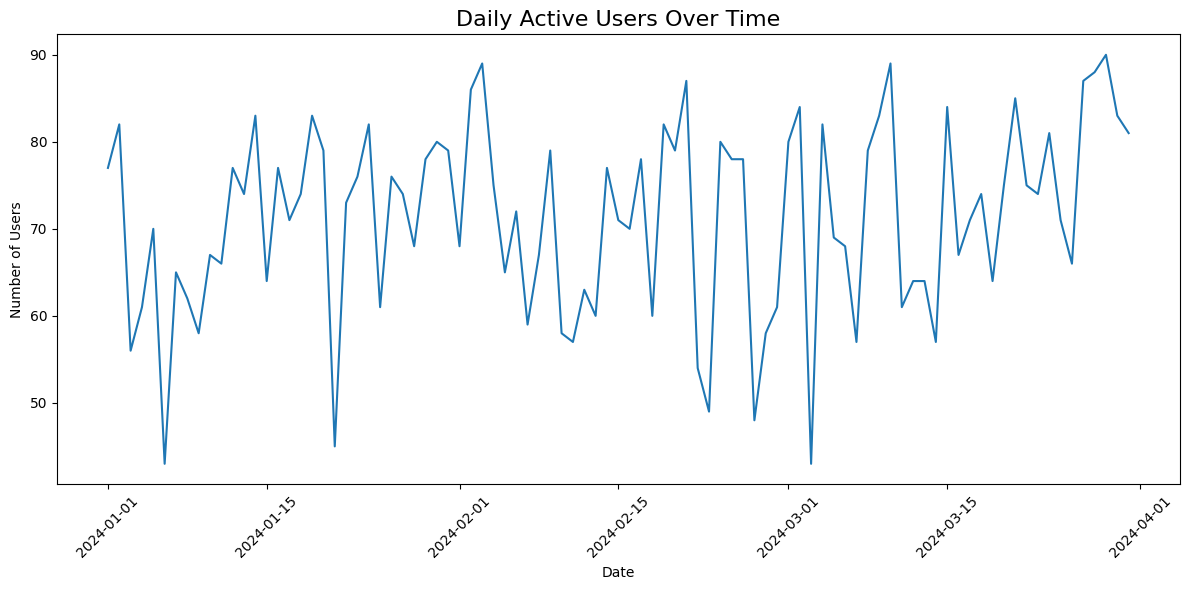

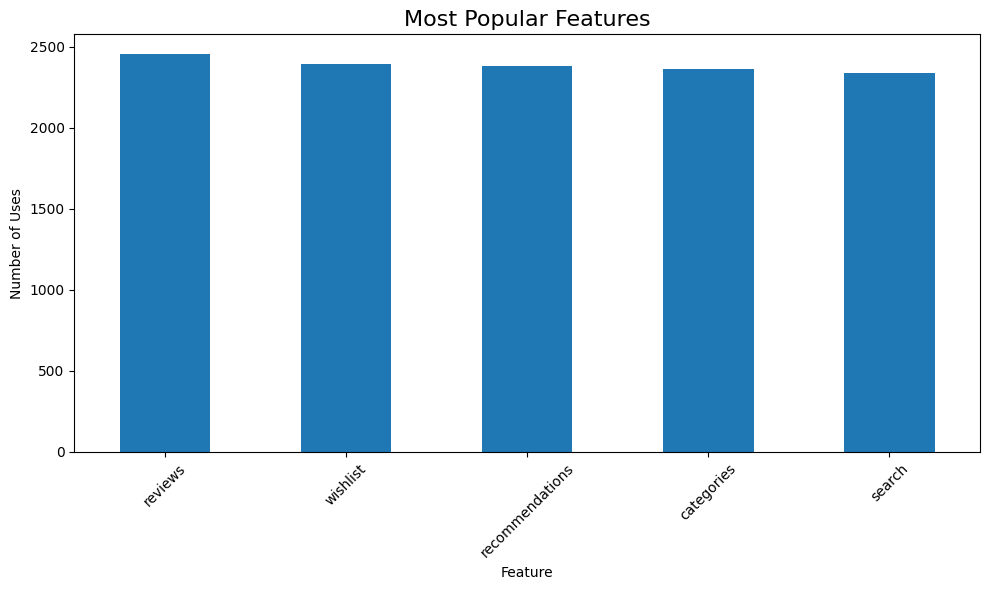

✅ Created 4 CSV files for your dashboard:
- daily_stats.csv (main KPIs)
- feature_stats.csv (feature trends)
- event_stats.csv (event breakdown)
- raw_events.csv (full dataset)

Preview of daily_stats.csv:
        date  daily_users  total_events  avg_session_minutes
0 2024-01-01           77           152            32.657895
1 2024-01-02           82           187            32.106952
2 2024-01-03           56            79            28.658228
3 2024-01-04           61            95            31.315789
4 2024-01-05           70           125            30.088000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
print("Everything installed!")


np.random.seed(42)  # Makes same random data each time

# Create dates for 3 months
dates = pd.date_range('2024-01-01', '2024-03-31', freq='D')
data = []


for date in dates:
    num_events = np.random.randint(50, 200)
    for _ in range(num_events):
        data.append({
            'user_id': np.random.randint(1, 101),
            'event_date': date,
            'event_type': np.random.choice(['login', 'view_product', 'add_to_cart', 'purchase']),
            'feature_used': np.random.choice(['search', 'recommendations', 'categories', 'wishlist', 'reviews']),
            'session_minutes': np.random.randint(1, 60)
        })

df = pd.DataFrame(data)
print(f"Created {len(df)} fake events!")
df.head()

# Count unique users per day
dau = df.groupby('event_date')['user_id'].nunique().reset_index()
dau.columns = ['date', 'daily_users']

print("Daily Active Users:")
print(dau.head(10))

# Show average
print(f"Average daily users: {dau['daily_users'].mean():.1f}")

# Add month column
df['month'] = df['event_date'].dt.to_period('M')

# Count unique users per month
mau = df.groupby('month')['user_id'].nunique().reset_index()
mau.columns = ['month', 'monthly_users']

print("Monthly Active Users:")
print(mau)

# Count which features are used most
top_features = df['feature_used'].value_counts()

print("Most Popular Features:")
print(top_features)

# Simple retention: users from week 1 who came back week 2
week1 = df[df['event_date'] <= '2024-01-07']['user_id'].unique()
week2 = df[(df['event_date'] >= '2024-01-08') & (df['event_date'] <= '2024-01-14')]['user_id'].unique()

# How many week1 users came back in week2?
returned_users = len(set(week1) & set(week2))
retention_rate = returned_users / len(week1) * 100

print(f"Week 1 users: {len(week1)}")
print(f"Returned in Week 2: {returned_users}")
print(f"Retention Rate: {retention_rate:.1f}%")

# Line chart of daily users
plt.figure(figsize=(12, 6))
plt.plot(dau['date'], dau['daily_users'])
plt.title('Daily Active Users Over Time', size=16)
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart of top features
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Most Popular Features', size=16)
plt.xlabel('Feature')
plt.ylabel('Number of Uses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Create summary data files for Tableau
# 1. Daily stats
daily_stats = df.groupby('event_date').agg({
    'user_id': 'nunique',
    'event_type': 'count',
    'session_minutes': 'mean'
}).reset_index()

daily_stats.columns = ['date', 'daily_users', 'total_events', 'avg_session_minutes']

# 2. Feature usage over time
feature_stats = df.groupby(['event_date', 'feature_used']).size().reset_index()
feature_stats.columns = ['date', 'feature', 'usage_count']

# 3. Event type breakdown
event_stats = df.groupby(['event_date', 'event_type']).size().reset_index()
event_stats.columns = ['date', 'event_type', 'count']

# Save all files
daily_stats.to_csv('daily_stats.csv', index=False)
feature_stats.to_csv('feature_stats.csv', index=False)
event_stats.to_csv('event_stats.csv', index=False)
df.to_csv('raw_events.csv', index=False)

print("✅ Created 4 CSV files for your dashboard:")
print("- daily_stats.csv (main KPIs)")
print("- feature_stats.csv (feature trends)")
print("- event_stats.csv (event breakdown)")
print("- raw_events.csv (full dataset)")

# Show what's in your main dashboard file
print("\nPreview of daily_stats.csv:")
print(daily_stats.head())